## Student Information
Name:戴天吟

Student ID:111034551

GitHub ID: Charlotte038

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

### Begin Assignment Here

## Take Home Exercises

### Loading Data in the DM2021-Lab1-master

In [28]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import sys
# print(sys.path)

# sys.path.append(r'C:\Users\flyin\OneDrive\桌面\HW\112-1\資料探勘\DMLab1\DM2023-Lab1-Master\DM2023-Lab1-Master\helpers')
sys.path.append(r'C:\Users\user\Desktop\碩士課程資料\112-1\資料探勘\HW\DM2023-Lab1-Master\Homework_10.26\Homework\helpers')
import data_mining_helpers as dmh
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [30]:
#Answer here
# 1.使用.at[]訪問特定位置的元素
at_X = X.at[1, 'text']
print("Example 1")
print(at_X)
print("--------------")


# 2. 使用.head()取得前幾筆資料
head_X = X.head(10)
print("Example 2")
print(head_X)
print("--------------")

# 3. 使用.sample()從資料集中隨機抽取一定數量或比例的樣本
sample_X = X.sample(n=3)
print("Example 3")
print(sample_X)

Example 1
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv domain, i.e  the mesh is a  	mapping of a 3d Bezier patch into 2d. The area in this domain 	which is inside a trimming loop had to be rendered. The trimming 	loop is a set of 2d Bezier curve segments. 	For the sake of notation: the mesh is made up of cells.  	My problem is this : 	The trimming area has to be split up into individual smaller 	cells bounded by the trimming curve segments. If a cell 	is wholly inside the area...then it is output as a whole , 	else it is trivially rejected.   	Does any body know how thiss can be done, or is there any algo.  	somewhere for doing this.  	Any help would be appreciated.  	Thanks,  	Ani. --  To get irritated is human, to stay 

### **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [31]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [32]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer here
- 'id': 'A', "np.nan" represents missing data -> no value -> NA_df shows "NaN" and isnull()=True
- 'id': 'B', no value entered in its "missing_example" column -> no value -> NA_df shows "NaN" and isnull()=True
- 'id': 'C','NaN' is a string -> actual value -> NA_df shows "NaN" and isnull()=False
- 'id': 'D','None' is a string -> actual value -> NA_df shows "None" and isnull()=False
- 'id': 'E', None is a special data type, also represents missing data(no value) and it also shows None in DataFrame -> NA_df shows "None" and isnull()=True
- 'id': 'F', '' is a null vaule -> actual value -> NA_df shows '' and isnull()=False

### **Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [33]:
X_sample = X.sample(n=1000,random_state=42) #random state

In [34]:
# Answer here
# 1. Check if columns are the same
if set(X.columns) == set(X_sample.columns):
    print("Columns in X and X_sample are the same.")
else:
    print("Columns in X and X_sample are different.")
print("\n")
    
# 2.Compare values in corresponding columns
for column in X.columns:
    if column in X_sample.columns:
        if X[column].equals(X_sample[column]):
            print("Values in column '{}' of X and X_sample are the same.".format(column))
        else:
            print("Values in column '{}' of X and X_sample are different.".format(column))
print("\n")

Columns in X and X_sample are the same.


Values in column 'text' of X and X_sample are different.
Values in column 'category' of X and X_sample are different.
Values in column 'category_name' of X and X_sample are different.




其他觀察:
- 根據 Exercise 8 的 X, X_sampl bar chart 比較，可發現兩組資料的 category 分布差不多，皆為'alt.atheism'> >'soc.religion.christian' > 'comp.graphics' > 'sci.med'

### **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

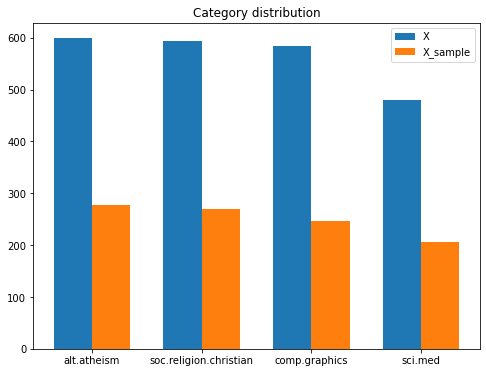

In [35]:
# Answer here  
X_axis = np.arange(len(categories)) 

width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(X_axis - width/2, X.category_name.value_counts(), width, label = 'X') 
plt.bar(X_axis + width/2, X_sample.category_name.value_counts(), width, label = 'X_sample') 

plt.xticks(X_axis, categories)  
plt.title("Category distribution")
plt.legend()
plt.show() 

### **Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [37]:
# Answer here
for i in range(1,len(X_counts.toarray())): #skip the first 1
    if(X_counts[4,i]==1): #since we want to find 1 in fifth record
        index=i
        break
print(index)
count_vect.get_feature_names_out()[index:index+1]

37


array(['01'], dtype=object)

### **Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

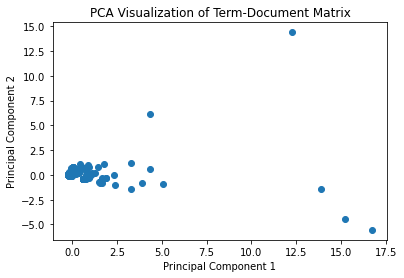

In [38]:
# Answer here

# 1.Dimensionality Reduction Techniques:
# Principal Component Analysis (PCA): PCA can reduce the dimensionality of the term-document matrix, allowing to visualize the data in a lower-dimensional space. 

# PCA + Random Sampling
from sklearn.decomposition import PCA
# Randomly sample a subset for visualization (e.g., 1000 documents and 500 terms)
random_subset = X_counts[:1000, :500]
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(random_subset.toarray())

# Visualize the PCA result
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Term-Document Matrix')
plt.show()

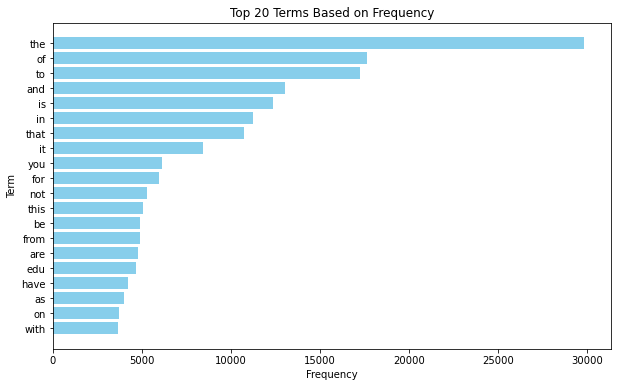

In [39]:
# 2.Top Terms Visualization:

# Convert the term-document matrix to a DataFrame
df_X = pd.DataFrame(data=X_counts.toarray(), columns=count_vect.get_feature_names_out())

# Calculate the sum of term frequencies across all documents
term_frequencies = df_X.sum()

# Find the top N terms based on frequency
top_terms = term_frequencies.nlargest(20)

# Visualize top_terms using bar chart or any appropriate plot
term_names = top_terms.index
frequencies = top_terms.values

# Creating a bar chart for top terms
plt.figure(figsize=(10, 6))
plt.barh(term_names, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Term')
plt.title('Top 20 Terms Based on Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequency term at the top
plt.show()

### **Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

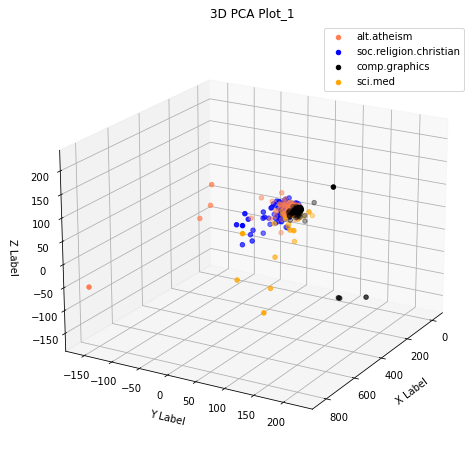

In [40]:
# Answer here
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to do Dimensionality Reduction
pca = PCA(n_components=3)
X_reduced_3 = pca.fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# Create 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over each category and plot a scatter plot
for c, category in zip(col, categories):
    # Select the data points of the corresponding category
    category_data = X_reduced_3[X['category_name'] == category]
    xs, ys, zs = category_data[:, 0], category_data[:, 1], category_data[:, 2]
    
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_title('3D PCA Plot_1')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.legend()

# first angle
ax.view_init(elev=20, azim=30)
plt.show()

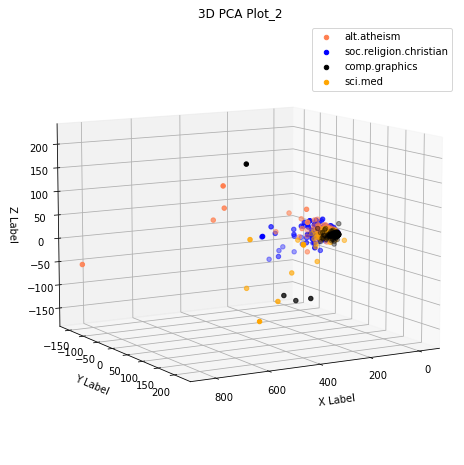

In [41]:
# Create 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over each category and plot a scatter plot
for c, category in zip(col, categories):
    # Select the data points of the corresponding category
    category_data = X_reduced_3[X['category_name'] == category]
    xs, ys, zs = category_data[:, 0], category_data[:, 1], category_data[:, 2]
    
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_title('3D PCA Plot_2')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.legend()

# second angle
ax.view_init(elev=10, azim=60)
plt.show()

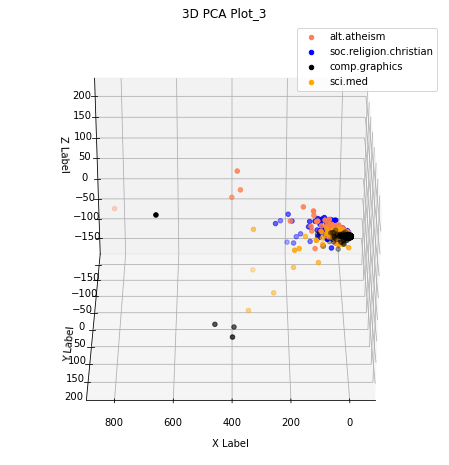

In [42]:
# Create 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over each category and plot a scatter plot
for c, category in zip(col, categories):
    # Select the data points of the corresponding category
    category_data = X_reduced_3[X['category_name'] == category]
    xs, ys, zs = category_data[:, 0], category_data[:, 1], category_data[:, 2]
    
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_title('3D PCA Plot_3')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.legend()

# third angle
ax.view_init(elev=30, azim=90)
plt.show()

Observation:
- first angle:ax.view_init(elev=20, azim=30)->'coral'and'orange' are relatively scattered
- second angle:ax.view_init(elev=10, azim=60)-> Each of the four colors has some scattered data points
- third angle:ax.view_init(elev=30, azim=90)->'coral', 'black' and 'orange' are relatively scattered

### **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [44]:
!pip install plotly

In [45]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [46]:
# Answer here
# 1.interative bar chart (can move the cursor over the graph to see the specific value)
import plotly.express as px
import pandas as pd

data = {
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
}
df = pd.DataFrame(data)
fig = px.bar(df, x='Term', y='Frequency', color='Term')

fig.update_xaxes(tickangle=90)
fig.update_layout(height=500, width=2000,title='Top 300 Terms Frequency',showlegend=False)

fig.show()

In [47]:
# 2. interative scatter chart (can zoom-in and zoom-out to see the data)
import plotly.express as px

pca = PCA(n_components=3)
X_reduced_3 = pca.fit_transform(X_counts.toarray())

df_plotly = pd.DataFrame(X_reduced_3, columns=['X', 'Y', 'Z'])
df_plotly['Category'] = X['category_name'] 

fig = px.scatter_3d(df_plotly, x='X', y='Y', z='Z', color='Category', opacity=0.7, size_max=10)
fig.update_layout(title='Interactive 3D Scatter Plot', scene=dict(aspectmode="cube"))

fig.show()

### **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [48]:
# Answer here
# Use "filter" to filter out less frequent data 
import plotly.express as px
import pandas as pd

data = {
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
}
df = pd.DataFrame(data)

filtered_df = df[df['Frequency'] > 20]
fig = px.bar(filtered_df, x='Term', y='Frequency', color='Term')

fig.update_xaxes(tickangle=90)
fig.update_layout(height=300, width=800, title='Top 300 Terms Frequency>20', showlegend=False)

fig.show()

In [49]:
# Use "filter" to filter out less frequent data 
import plotly.express as px
import pandas as pd

data = {
    'Term': count_vect.get_feature_names_out()[:],
    'Frequency': term_frequencies[:]
}
df = pd.DataFrame(data)

filtered_df = df[df['Frequency'] > 1000]
fig = px.bar(filtered_df, x='Term', y='Frequency', color='Term')

fig.update_xaxes(tickangle=90)
fig.update_layout(height=300, width=1000, title='Terms Frequency>1000', showlegend=False)

fig.show()

### **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [50]:
# Answer here
import plotly.express as px
import pandas as pd

data = {
    'Name': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
}
df = pd.DataFrame(data)
df.sort_values(ascending=False,by='Frequency',inplace=True)

fig = px.bar(df, x='Name', y='Frequency',color='Name')

fig.update_xaxes(tickangle=90)
fig.update_layout(height=300, width=1000, title='', showlegend=False)

fig.show()

### **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [51]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [52]:
mlb = preprocessing.LabelBinarizer()

In [53]:
mlb.fit(X.category)

LabelBinarizer()

In [54]:
# Answer here
mlb.fit(X.category_name)

LabelBinarizer()

In [55]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [56]:
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


## New Dataset

### Data Source

In [57]:
# Read "sentiment labelled sentences"
amazon_data= pd.read_table(r'.\sentiment labelled sentences\amazon_cells_labelled.txt',header=None)
imdb_data= pd.read_table(r'.\sentiment labelled sentences\imdb_labelled.txt',header=None)
yelp_data= pd.read_table(r'.\sentiment labelled sentences\yelp_labelled.txt',header=None)

In [58]:
amazon_data.shape

(1000, 2)

In [59]:
imdb_data.shape

(748, 2)

In [60]:
# reread 'imdb_labelled.txt'
import pandas as pd

with open('.\sentiment labelled sentences\imdb_labelled.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = []
for line in lines:
    text, label = line.strip().split('\t')  # Use '\t' split text
    data.append({'Text': text, 'Label': int(label)})

imdb_data = pd.DataFrame(data)


print(imdb_data.head())
print(imdb_data.shape)

                                                Text  Label
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1
(1000, 2)


In [61]:
yelp_data.shape

(1000, 2)

In [62]:
# Merge 3 Dataframe
amazon_data.columns = imdb_data.columns = yelp_data.columns = ["Text", "Label"]
df = pd.concat([amazon_data, imdb_data, yelp_data], ignore_index=True)
print(df.shape)
print(df.head())

(3000, 2)
                                                Text  Label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


### Data Preparation

In [63]:
df.loc[0:1]

,Text,Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [64]:
type(df)

pandas.core.frame.DataFrame

In [65]:
len(df)

3000

In [66]:
for i in range(len(df)):
    print(df.iloc[i])

Text     So there is no way for me to plug it in here i...
Label                                                    0
Name: 0, dtype: object
Text     Good case, Excellent value.
Label                              1
Name: 1, dtype: object
Text     Great for the jawbone.
Label                         1
Name: 2, dtype: object
Text     Tied to charger for conversations lasting more...
Label                                                    0
Name: 3, dtype: object
Text     The mic is great.
Label                    1
Name: 4, dtype: object
Text     I have to jiggle the plug to get it to line up...
Label                                                    0
Name: 5, dtype: object
Text     If you have several dozen or several hundred c...
Label                                                    0
Name: 6, dtype: object
Text     If you are Razr owner...you must have this!
Label                                              1
Name: 7, dtype: object
Text     Needless to say, I wasted my money.
L

Name: 114, dtype: object
Text     The keyboard is a nice compromise between a fu...
Label                                                    1
Name: 115, dtype: object
Text     i got this phone around the end of may and i'm...
Label                                                    0
Name: 116, dtype: object
Text     It is very comfortable on the ear.
Label                                     1
Name: 117, dtype: object
Text     It has been a winner for us.
Label                               1
Name: 118, dtype: object
Text     )Setup couldn't have been simpler.
Label                                     1
Name: 119, dtype: object
Text     I've tried several different earpieces for my ...
Label                                                    1
Name: 120, dtype: object
Text     Could not get strong enough signal.
Label                                      0
Name: 121, dtype: object
Text     Iam very pleased with my purchase.
Label                                     1
Name: 122, dtype

Name: 236, dtype: object
Text     Authentic leather with nice shine and comfort ...
Label                                                    1
Name: 237, dtype: object
Text     I was very excited to get this headset because...
Label                                                    1
Name: 238, dtype: object
Text     Do not make the same mistake as me.
Label                                      0
Name: 239, dtype: object
Text     Big Disappointment with calendar sync.
Label                                         0
Name: 240, dtype: object
Text     the phone was unusable and was not new.
Label                                          0
Name: 241, dtype: object
Text     Worst Customer Service Ever.
Label                               0
Name: 242, dtype: object
Text     No additional ear gels provided, and no instru...
Label                                                    0
Name: 243, dtype: object
Text     It defeats the purpose of a bluetooth headset.
Label                         

Name: 351, dtype: object
Text     Comfortable, Nice Range, Good Battery Life.
Label                                              1
Name: 352, dtype: object
Text     Their network coverage in Los Angeles is horri...
Label                                                    0
Name: 353, dtype: object
Text     Excellent starter wireless headset.
Label                                      0
Name: 354, dtype: object
Text     The loudspeaker option is great, the bumpers w...
Label                                                    0
Name: 355, dtype: object
Text     The only thing that I think could improve is t...
Label                                                    0
Name: 356, dtype: object
Text     First off the reception sucks, I have never ha...
Label                                                    0
Name: 357, dtype: object
Text     The phone gets EXTREMELY HOT!
Label                                0
Name: 358, dtype: object
Text     The microphone also works well, but (accordin

Name: 476, dtype: object
Text     The volume switch rocketed out of the unit to ...
Label                                                    0
Name: 477, dtype: object
Text     It holds a charge for a long time, is reasonab...
Label                                                    1
Name: 478, dtype: object
Text     I'd like to return it.
Label                         0
Name: 479, dtype: object
Text     The keyboard is really worthwhile in usefulnes...
Label                                                    1
Name: 480, dtype: object
Text     Verizon's bills, however, are difficult to und...
Label                                                    0
Name: 481, dtype: object
Text     After charging overnight, these batteries work...
Label                                                    1
Name: 482, dtype: object
Text     You won't regret it!
Label                       1
Name: 483, dtype: object
Text     I love this phone!.
Label                      1
Name: 484, dtype: object
Tex

Name: 591, dtype: object
Text     THey are so cool!
Label                    1
Name: 592, dtype: object
Text     Easy to use.
Label               1
Name: 593, dtype: object
Text     Better Than New.
Label                   1
Name: 594, dtype: object
Text     What possesed me to get this junk, I have no i...
Label                                                    0
Name: 595, dtype: object
Text     Piece of trash.
Label                  0
Name: 596, dtype: object
Text     A pretty good product.
Label                         1
Name: 597, dtype: object
Text     This is a great phone!.
Label                          1
Name: 598, dtype: object
Text     For the price on Amazon, it is an excellent pr...
Label                                                    1
Name: 599, dtype: object
Text     Their Research and Development division obviou...
Label                                                    1
Name: 600, dtype: object
Text     The real killer is the volume, and of course i...
Label  

Name: 718, dtype: object
Text     if you simply want a small flip phone -- look ...
Label                                                    0
Name: 719, dtype: object
Text     Good value, works fine - power via USB, car, o...
Label                                                    1
Name: 720, dtype: object
Text     My phone doesn't slide around my car now and t...
Label                                                    1
Name: 721, dtype: object
Text     This is simply the BEST bluetooth headset for ...
Label                                                    1
Name: 722, dtype: object
Text     Think it over when you plan to own this one!Th...
Label                                                    0
Name: 723, dtype: object
Text     In the span of an hour, I had two people excla...
Label                                                    1
Name: 724, dtype: object
Text     I have always used corded headsets and the fre...
Label                                                    1

Name: 837, dtype: object
Text     Reaching for the bottom row is uncomfortable, ...
Label                                                    0
Name: 838, dtype: object
Text     I have bought this Nokia cell phone a few week...
Label                                                    0
Name: 839, dtype: object
Text     It would take too long to describe how bad my ...
Label                                                    0
Name: 840, dtype: object
Text     the only VERY DISAPPOINTING thing was there wa...
Label                                                    0
Name: 841, dtype: object
Text     Terrible.. My car will not accept this cassette.
Label                                                   0
Name: 842, dtype: object
Text     Product is useless, since it does not have eno...
Label                                                    0
Name: 843, dtype: object
Text     It's not what it says it is.
Label                               0
Name: 844, dtype: object
Text     Stay Away

Name: 954, dtype: object
Text     Buttons are too small.
Label                         0
Name: 955, dtype: object
Text     Just reading on the specs alone makes you say ...
Label                                                    1
Name: 956, dtype: object
Text     Love it.. Great armband.
Label                           1
Name: 957, dtype: object
Text     I really like this product over the Motorola b...
Label                                                    1
Name: 958, dtype: object
Text     However, the keypads are so tinny that I somet...
Label                                                    0
Name: 959, dtype: object
Text     I exchanged the sony ericson z500a for this an...
Label                                                    1
Name: 960, dtype: object
Text     I was very impressed with the price of the cases.
Label                                                    1
Name: 961, dtype: object
Text     Also makes it easier to hold on to.
Label                            

Name: 1092, dtype: object
Text     There was NOTHING believable about it at all.  
Label                                                  0
Name: 1093, dtype: object
Text     The only suspense I was feeling was the frustr...
Label                                                    0
Name: 1094, dtype: object
Text     MANNA FROM HEAVEN is a terrific film that is b...
Label                                                    1
Name: 1095, dtype: object
Text     The scenes are often funny and occasionally to...
Label                                                    1
Name: 1096, dtype: object
Text     The cast of veteran actors are more than just ...
Label                                                    1
Name: 1097, dtype: object
Text     Ursula Burton's portrayal of the nun is both t...
Label                                                    1
Name: 1098, dtype: object
Text     If you are looking for a movie with a terrific...
Label                                                  

Name: 1222, dtype: object
Text     This is a chilly, unremarkable movie about an ...
Label                                                    0
Name: 1223, dtype: object
Text     The flat reenactments don't hold your attentio...
Label                                                    0
Name: 1224, dtype: object
Text     And the rest of it just sits there being awful...
Label                                                    0
Name: 1225, dtype: object
Text     He can bore you to pieces, and kill the moment...
Label                                                    0
Name: 1226, dtype: object
Text     Schrader has made a resume full of lousy, amat...
Label                                                    0
Name: 1227, dtype: object
Text     When I first watched this movie, in the 80s, I...
Label                                                    1
Name: 1228, dtype: object
Text     I was totally fascinated by the music, the dan...
Label                                              

Text     The ending is so, SO perfect... you'll shed a ...
Label                                                    1
Name: 1323, dtype: object
Text     I am so thrilled after seeing a movie like thi...
Label                                                    1
Name: 1324, dtype: object
Text     I will never forget it now.  
Label                                1
Name: 1325, dtype: object
Text     It is not just a cult... it is a cult CLASSIC.  
Label                                                   1
Name: 1326, dtype: object
Text     Which has more depth and character than the ma...
Label                                                    0
Name: 1327, dtype: object
Text     The Malta settings are as dry and as barren as...
Label                                                    0
Name: 1328, dtype: object
Text     This movie is terrible.  
Label                            0
Name: 1329, dtype: object
Text     The hockey scenes are terrible, defensemen pla...
Label                  

Text     I won't say any more - I don't like spoilers, ...
Label                                                    1
Name: 1449, dtype: object
Text     Wow, what a bad film.  
Label                          0
Name: 1450, dtype: object
Text     Not frightening in the least, and barely compr...
Label                                                    0
Name: 1451, dtype: object
Text     The plot doesn't hang together at all, and the...
Label                                                    0
Name: 1452, dtype: object
Text     Not even good for camp value!  
Label                                  0
Name: 1453, dtype: object
Text     I wasn't expecting Oscar material, but this?  
Label                                                 0
Name: 1454, dtype: object
Text     You'd have to have the IQ of particularly stup...
Label                                                    0
Name: 1455, dtype: object
Text     This film (and I use that word loosely) is an ...
Label                      

Name: 1589, dtype: object
Text     I can't believe there's even a sequel to this!  
Label                                                   0
Name: 1590, dtype: object
Text     Which is precisely why I am giving it such a b...
Label                                                    0
Name: 1591, dtype: object
Text     Being a 90's child, I truly enjoyed this show ...
Label                                                    1
Name: 1592, dtype: object
Text     But "Tiny Toons" kept the 90's vibe and delive...
Label                                                    1
Name: 1593, dtype: object
Text     The memories are murky but I can only say that...
Label                                                    1
Name: 1594, dtype: object
Text     Easily, none other cartoon made me laugh in a ...
Label                                                    1
Name: 1595, dtype: object
Text     The characters were all funny and had the pecu...
Label                                                

Name: 1727, dtype: object
Text     Very nice and relaxing late night viewing.  
Label                                               1
Name: 1728, dtype: object
Text     The movie is full of wonderful dancing (hence ...
Label                                                    1
Name: 1729, dtype: object
Text     ) some great music, and terrific scenery.  
Label                                              1
Name: 1730, dtype: object
Text     It handles some tough issues with dignity and ...
Label                                                    1
Name: 1731, dtype: object
Text     ) a happy, wonderful, feel good ending!  
Label                                            1
Name: 1732, dtype: object
Text     The point is the journey, a journey that touch...
Label                                                    1
Name: 1733, dtype: object
Text     It's one of the movies I need to see whenever ...
Label                                                    1
Name: 1734, dtype: object
Text

Text     The dialogue is atrocious.  
Label                               0
Name: 1851, dtype: object
Text     The acting is beyond abysmal.  
Label                                  0
Name: 1852, dtype: object
Text     Everything stinks.  
Label                       0
Name: 1853, dtype: object
Text     Trouble is, the writing and directing make it ...
Label                                                    0
Name: 1854, dtype: object
Text     Worse, there's an incredibly weak sub-plot thr...
Label                                                    0
Name: 1855, dtype: object
Text     It's dumb and pointless, and a complete waste ...
Label                                                    0
Name: 1856, dtype: object
Text     In short, don't bother with this movie.  
Label                                            0
Name: 1857, dtype: object
Text     I won't spoil it, but the ending in pretty ama...
Label                                                    1
Name: 1858, dtype: object


Text     Exceptionally bad!  
Label                       0
Name: 1998, dtype: object
Text     All in all its an insult to one's intelligence...
Label                                                    0
Name: 1999, dtype: object
Text     Wow... Loved this place.
Label                           1
Name: 2000, dtype: object
Text     Crust is not good.
Label                     0
Name: 2001, dtype: object
Text     Not tasty and the texture was just nasty.
Label                                            0
Name: 2002, dtype: object
Text     Stopped by during the late May bank holiday of...
Label                                                    1
Name: 2003, dtype: object
Text     The selection on the menu was great and so wer...
Label                                                    1
Name: 2004, dtype: object
Text     Now I am getting angry and I want my damn pho.
Label                                                 0
Name: 2005, dtype: object
Text     Honeslty it didn't taste THAT f

Name: 2128, dtype: object
Text     Definitely worth venturing off the strip for t...
Label                                                    1
Name: 2129, dtype: object
Text     This place is way too overpriced for mediocre ...
Label                                                    0
Name: 2130, dtype: object
Text     Penne vodka excellent!
Label                         1
Name: 2131, dtype: object
Text     They have a good selection of food including a...
Label                                                    1
Name: 2132, dtype: object
Text     The management is rude.
Label                          0
Name: 2133, dtype: object
Text     Delicious NYC bagels, good selections of cream...
Label                                                    1
Name: 2134, dtype: object
Text     Great Subway, in fact it's so good when you co...
Label                                                    1
Name: 2135, dtype: object
Text     I had a seriously solid breakfast here.
Label                  

Text     The chefs were friendly and did a good job.
Label                                              1
Name: 2274, dtype: object
Text     I've had better, not only from dedicated boba ...
Label                                                    0
Name: 2275, dtype: object
Text     I liked the patio and the service was outstand...
Label                                                    1
Name: 2276, dtype: object
Text     The goat taco didn't skimp on the meat and wow...
Label                                                    1
Name: 2277, dtype: object
Text     I think not again
Label                    0
Name: 2278, dtype: object
Text     I had the mac salad and it was pretty bland so...
Label                                                    0
Name: 2279, dtype: object
Text     I went to Bachi Burger on a friend's recommend...
Label                                                    1
Name: 2280, dtype: object
Text     Service stinks here!
Label                       0
Name: 22

Name: 2421, dtype: object
Text     Furthermore, you can't even find hours of oper...
Label                                                    0
Name: 2422, dtype: object
Text     We've tried to like this place but after 10+ t...
Label                                                    0
Name: 2423, dtype: object
Text     What a mistake that was!
Label                           0
Name: 2424, dtype: object
Text     No complaints!
Label                 1
Name: 2425, dtype: object
Text     This is some seriously good pizza and I'm an e...
Label                                                    1
Name: 2426, dtype: object
Text     Waiter was a jerk.
Label                     0
Name: 2427, dtype: object
Text     Strike 2, who wants to be rushed.
Label                                    0
Name: 2428, dtype: object
Text     These are the nicest restaurant owners I've ev...
Label                                                    1
Name: 2429, dtype: object
Text     I never come again.
Label  

Text     I will never go back to this place and will ne...
Label                                                    0
Name: 2565, dtype: object
Text     The servers went back and forth several times,...
Label                                                    0
Name: 2566, dtype: object
Text     Food was delicious!
Label                      1
Name: 2567, dtype: object
Text     AN HOUR... seriously?
Label                        0
Name: 2568, dtype: object
Text     I consider this theft.
Label                         0
Name: 2569, dtype: object
Text     Eew... This location needs a complete overhaul.
Label                                                  0
Name: 2570, dtype: object
Text     We recently witnessed her poor quality of mana...
Label                                                    0
Name: 2571, dtype: object
Text     Waited and waited and waited.
Label                                0
Name: 2572, dtype: object
Text     He also came back to check on us regularly, ex...
Lab

Name: 2726, dtype: object
Text     A FLY was in my apple juice.. A FLY!!!!!!!!
Label                                              0
Name: 2727, dtype: object
Text     The Han Nan Chicken was also very tasty.
Label                                           1
Name: 2728, dtype: object
Text     As for the service, I thought it was good.
Label                                             1
Name: 2729, dtype: object
Text     The food was barely lukewarm, so it must have ...
Label                                                    0
Name: 2730, dtype: object
Text     Ryan's Bar is definitely one Edinburgh establi...
Label                                                    0
Name: 2731, dtype: object
Text     Nicest Chinese restaurant I've been in a while.
Label                                                  1
Name: 2732, dtype: object
Text     Overall, I like there food and the service.
Label                                              1
Name: 2733, dtype: object
Text     They also now ser

Text     The Wife hated her meal (coconut shrimp), and ...
Label                                                    0
Name: 2854, dtype: object
Text     My fella got the huevos rancheros and they did...
Label                                                    0
Name: 2855, dtype: object
Text     Went in for happy hour, great list of wines.
Label                                               1
Name: 2856, dtype: object
Text     Some may say this buffet is pricey but I think...
Label                                                    1
Name: 2857, dtype: object
Text     I probably won't be coming back here.
Label                                        0
Name: 2858, dtype: object
Text     Worst food/service I've had in a while.
Label                                          0
Name: 2859, dtype: object
Text     This place is pretty good, nice little vibe in...
Label                                                    1
Name: 2860, dtype: object
Text     Talk about great customer service of 

Name: 2981, dtype: object
Text     Food was below average.
Label                          0
Name: 2982, dtype: object
Text     It sure does beat the nachos at the movies but...
Label                                                    0
Name: 2983, dtype: object
Text     All in all, Ha Long Bay was a bit of a flop.
Label                                               0
Name: 2984, dtype: object
Text     The problem I have is that they charge $11.99 ...
Label                                                    0
Name: 2985, dtype: object
Text     Shrimp- When I unwrapped it (I live only 1/2 a...
Label                                                    0
Name: 2986, dtype: object
Text     It lacked flavor, seemed undercooked, and dry.
Label                                                 0
Name: 2987, dtype: object
Text     It really is impressive that the place hasn't ...
Label                                                    0
Name: 2988, dtype: object
Text     I would avoid this place 

### Data Transformation

#### Adding Columns

In [67]:
# label_name
Label_name = ['positive', 'negative']

In [68]:
# add new column = label_name
df['Label_name'] = df.Label.apply(lambda t: 'Positive' if 1 == t else 'Negative')

In [69]:
df[0:10]

,Text,Label,Label_name
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive
5,I have to jiggle the plug to get it to line up...,0,Negative
6,If you have several dozen or several hundred c...,0,Negative
7,If you are Razr owner...you must have this!,1,Positive
8,"Needless to say, I wasted my money.",0,Negative
9,What a waste of money and time!.,0,Negative


In [70]:
df.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: Text, dtype: object

### Data Mining using Pandas

#### Missing Values

In [71]:
df.isnull()

,Text,Label,Label_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [72]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,Text,Label,Label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [73]:
# dummy record as dictionary format
dummy_dict = [{'Text': 'dummy_record',
               'Label': 1
              }]
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)
len(df)

3001

In [74]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,Text,Label,Label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,Text,Label,Label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [77]:
len(df)

3000

#### Dealing with Duplicate Data

In [78]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [79]:
sum(df.duplicated())

17

In [80]:
# Find Duplicate Data -> show
duplicates = df[df.duplicated()]
print(duplicates)

                                                   Text  Label Label_name
285                                       Great phone!.      1   Positive
407                                        Works great.      1   Positive
524                                       Works great!.      1   Positive
543                             Don't buy this product.      0   Negative
744   If you like a loud buzzing to override all you...      0   Negative
748                                       Does not fit.      0   Negative
778                               This is a great deal.      1   Positive
792                                        Great Phone.      1   Positive
892                    Excellent product for the price.      1   Positive
896                                        Great phone.      1   Positive
1363                   Definitely worth checking out.        1   Positive
1585                                 Not recommended.        0   Negative
1788                                  

In [81]:
# Get rid of all the duplicated records with preserving a copy(keep = 'first')
df_no_duplicates = df.drop_duplicates(keep = 'first')
print(df_no_duplicates)

                                                   Text  Label Label_name
0     So there is no way for me to plug it in here i...      0   Negative
1                           Good case, Excellent value.      1   Positive
2                                Great for the jawbone.      1   Positive
3     Tied to charger for conversations lasting more...      0   Negative
4                                     The mic is great.      1   Positive
...                                                 ...    ...        ...
2995  I think food should have flavor and texture an...      0   Negative
2996                           Appetite instantly gone.      0   Negative
2997  Overall I was not impressed and would not go b...      0   Negative
2998  The whole experience was underwhelming, and I ...      0   Negative
2999  Then, as if I hadn't wasted enough of my life ...      0   Negative

[2983 rows x 3 columns]


In [82]:
# Get rid of all the duplicated records with preserving a copy(keep = False)
df_no_duplicates2 = df.drop_duplicates(keep = False)
print(df_no_duplicates2)

                                                   Text  Label Label_name
0     So there is no way for me to plug it in here i...      0   Negative
1                           Good case, Excellent value.      1   Positive
2                                Great for the jawbone.      1   Positive
3     Tied to charger for conversations lasting more...      0   Negative
4                                     The mic is great.      1   Positive
...                                                 ...    ...        ...
2995  I think food should have flavor and texture an...      0   Negative
2996                           Appetite instantly gone.      0   Negative
2997  Overall I was not impressed and would not go b...      0   Negative
2998  The whole experience was underwhelming, and I ...      0   Negative
2999  Then, as if I hadn't wasted enough of my life ...      0   Negative

[2966 rows x 3 columns]


### Data Preprocessing

#### Sampling

In [83]:
print(df.shape)
df_sample = df.sample(n=1000,random_state=38) #random state
display(df_sample)

(3000, 3)


,Text,Label,Label_name
2132,They have a good selection of food including a...,1,Positive
1944,"However, after finally watching this film, I r...",1,Positive
761,They have been around for years and carries th...,1,Positive
1022,How can anyone in their right mind ask for any...,1,Positive
2778,My girlfriend's veal was very bad.,0,Negative
...,...,...,...
2331,"Both of them were truly unbelievably good, and...",1,Positive
2241,Now this dish was quite flavourful.,1,Positive
2969,I don't know what the big deal is about this p...,0,Negative
2697,I was mortified.,0,Negative


In [84]:
df[0:10]

,Text,Label,Label_name
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive
5,I have to jiggle the plug to get it to line up...,0,Negative
6,If you have several dozen or several hundred c...,0,Negative
7,If you are Razr owner...you must have this!,1,Positive
8,"Needless to say, I wasted my money.",0,Negative
9,What a waste of money and time!.,0,Negative


Negative    1500
Positive    1500
Name: Label_name, dtype: int64


<AxesSubplot:title={'center':'Label Distribution'}>

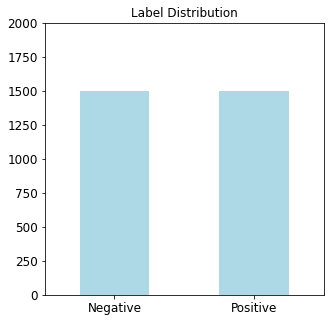

In [85]:
print(df.Label_name.value_counts())

# plot barchart for amazon_data
df.Label_name.value_counts().plot(kind = 'bar',
                                  title = 'Label Distribution',
                                  ylim = [0, 2000], color='#ADD8E6',        
                                  rot = 0, fontsize = 12, figsize = (5,5))

Negative    502
Positive    498
Name: Label_name, dtype: int64


<AxesSubplot:title={'center':'Label Distribution_Sample'}>

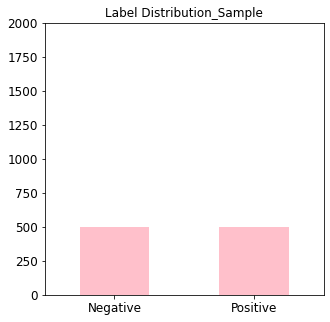

In [86]:
print(df_sample.Label_name.value_counts())

# plot barchart for X_sample
df_sample.Label_name.value_counts().plot(kind = 'bar',
                                         title = 'Label Distribution_Sample',
                                         ylim = [0, 2000], color='pink',
                                         rot = 0, fontsize = 12, figsize = (5,5))

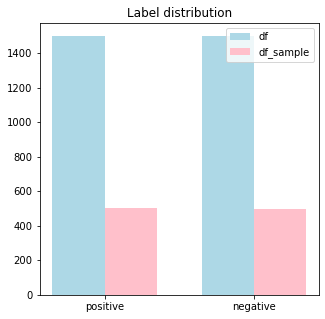

In [87]:
df_axis = np.arange(len(Label_name)) 

width = 0.35
plt.figure(figsize=(5, 5))
plt.bar(df_axis - width/2, df.Label_name.value_counts(), width, label = 'df', color='#ADD8E6',) 
plt.bar(df_axis + width/2, df_sample.Label_name.value_counts(), width, label = 'df_sample',color='pink') 

plt.xticks(df_axis, Label_name)  
plt.title("Label distribution")
plt.legend()
plt.show() 

In [88]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Feature Creation

In [89]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
df['Unigrams'] = df['Text'].apply(lambda x: dmh.tokenize_text(x))

In [91]:
df[0:8]["Unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
5    [I, have, to, jiggle, the, plug, to, get, it, ...
6    [If, you, have, several, dozen, or, several, h...
7    [If, you, are, Razr, owner, ..., you, must, ha...
Name: Unigrams, dtype: object

In [92]:
list(df[0:1]['Unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

#### Feature Subset Selection

In [93]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.Text) #learn the vocabulary and return document-term matrix
print(df_counts.shape)
print(df_counts[0])

(3000, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [94]:
analyze = count_vect.build_analyzer()
analyze(df.Text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [95]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [96]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [97]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [98]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:10]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(amazon_data.index)[0:10]]
print(plot_y)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9']


In [99]:
plot_z = df_counts[0:10, 0:10].toarray() #amazon_data_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17
doc_0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0


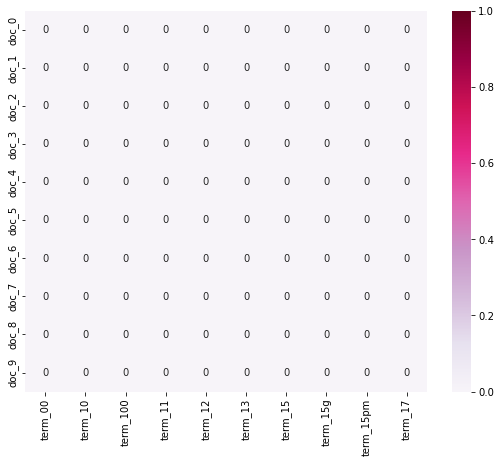

In [100]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Dimensionality Reduction

In [101]:
print(df_counts.shape)
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(3000, 5155)
(3000, 2)


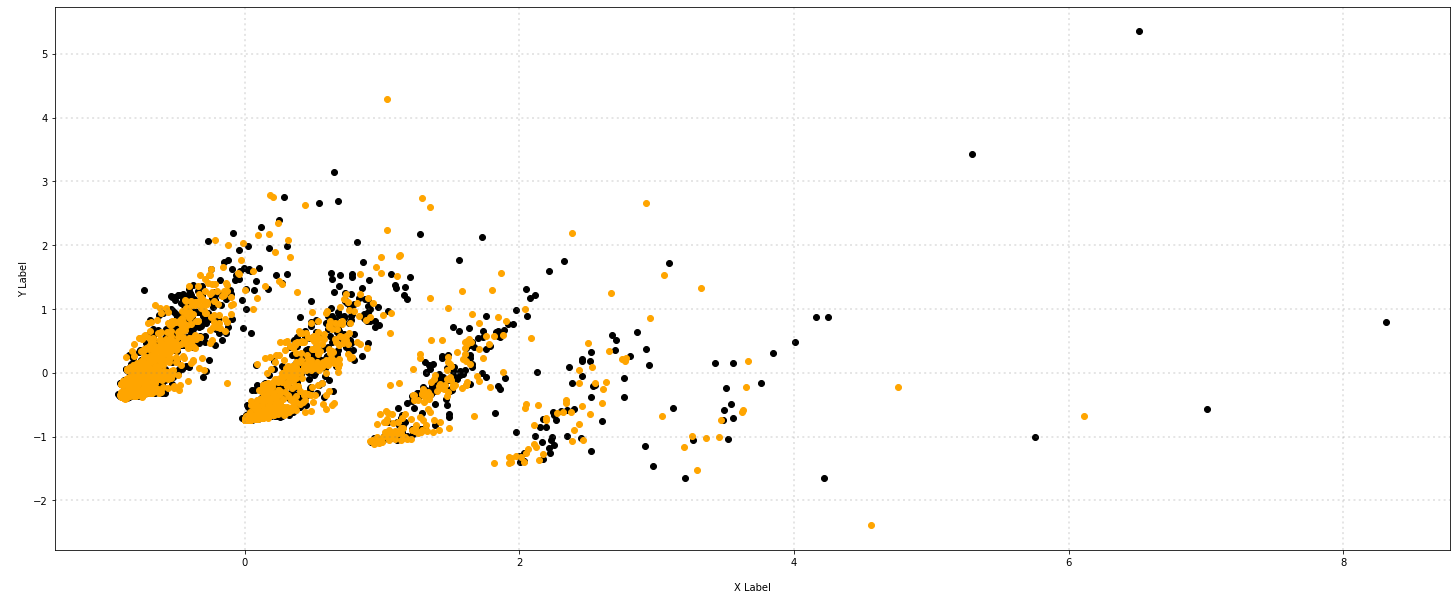

In [102]:
col = ['black', 'orange']
Labels = [1,0]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, Label in zip(col, Labels):
    xs = df_reduced[df['Label'] == Label].T[0]
    ys = df_reduced[df['Label'] == Label].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

#### Attribute Transformation / Aggregation

In [103]:
df_term_frequencies = []
print(df_counts.shape[1])
for j in range(0,df_counts.shape[1]):
    df_term_frequencies.append(sum(df_counts[:,j].toarray()))


5155


In [104]:
df_term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [105]:
df_term_frequencies[1] #sum of second term

38

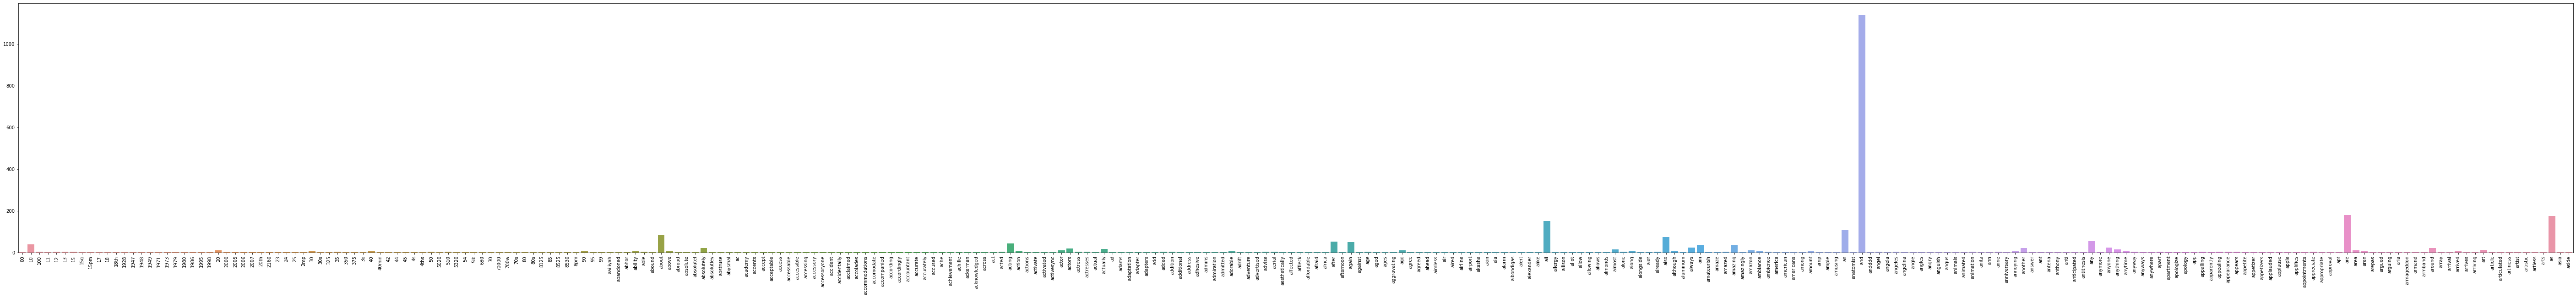

In [106]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=df_term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [107]:
import math
df_term_frequencies_log = [math.log(i) for i in df_term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


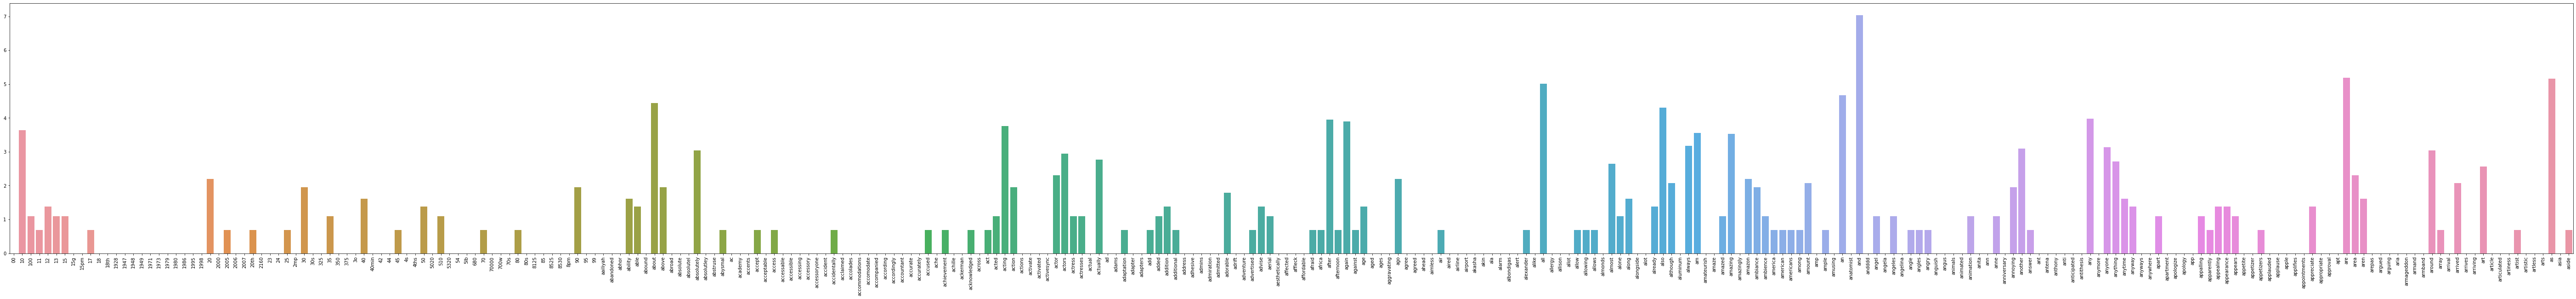

In [108]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=df_term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

#### Discretization and Binarization

In [109]:
mlb = preprocessing.LabelBinarizer()

In [110]:
mlb.fit(df.Label)

LabelBinarizer()

In [111]:
df['bin_category'] = mlb.transform(df['Label']).tolist()

In [112]:
df[0:10]

,Text,Label,Label_name,Unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,Positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,Negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,Negative,"[What, a, waste, of, money, and, time, !, .]",[0]


### Data Exploration

In [113]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['Text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['Text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['Text']
document_to_transform_3.append(random_record_3)

In [114]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [115]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [116]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Tasks

### Task 1
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

#### Text Length Distribution

In [117]:
# Add new column [Lengths]
df['Lengths'] = df['Text'].apply(len)

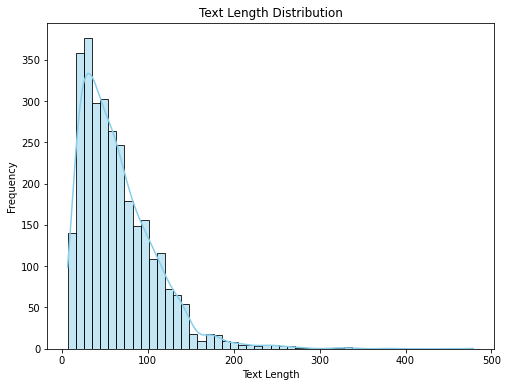

In [118]:
#1. Text Length Distribution - bar chart
plt.figure(figsize=(8, 6))
sns.histplot(df['Lengths'], bins=50, color='skyblue', kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()


#### Word Frequency Analysis 

In [119]:
sample_df = df.sample(n=100, random_state=42)
combined_text = ' '.join(sample_df['Text'])

In [120]:
#2.
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize the text into words
words = word_tokenize(combined_text)

# Count word frequencies
word_freq = Counter(words)

# Sort word frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Select top 100 most frequent words
top_100_words = dict(list(sorted_word_freq.items())[:100])

# Convert word frequency dictionary to DataFrame
word_freq_df = pd.DataFrame(list(top_100_words.items()), columns=['Word', 'Frequency'])

# Plot the top 100 most frequent words
import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.bar(word_freq_df['Word'], word_freq_df['Frequency'])
# plt.xlabel('Word')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)
# plt.title('Top 100 Most Frequent Words')
# plt.show() #文字雲
fig = px.bar(word_freq_df, x='Word', y='Frequency', text='Frequency')
fig.update_traces(marker_color='skyblue')
fig.update_xaxes(tickangle=90)
fig.update_layout(title='Word Frequency', xaxis_title='', yaxis_title='Frequency')
fig.show()

In [121]:
df_term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

data_new = {
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
}
df_new = pd.DataFrame(data_new)
fig = px.bar(df_new, x='Term', y='Frequency', color='Term')

fig.update_xaxes(tickangle=90)
fig.update_layout(height=500, width=2000,title='Top 300 Terms Frequency',showlegend=False)

fig.show()

### Task 2
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(df["Text"])

tfidf_features_result = pd.DataFrame(tfidf_features.toarray(), columns = vectorizer.get_feature_names_out())
tfidf_features_result


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# Inspect the Vocabulary:
feature_names = vectorizer.get_feature_names_out()
print("Vocabulary size:", len(feature_names))
print("Some feature names:", feature_names[:10])


Vocabulary size: 5155
Some feature names: ['00' '10' '100' '11' '12' '13' '15' '15g' '15pm' '17']


### Task 3
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

#### Simple Naive Bayes classifier

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X = df['Text']  # Features (text data)
y = df['Label']  # Labels (categories)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data to numerical features (word counts)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test data
predictions = naive_bayes_classifier.predict(X_test_vectorized)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed evaluation
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       299
           1       0.85      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.84      0.84      0.83       600
weighted avg       0.84      0.83      0.83       600



#### Simple Naive Bayes classifier + TF-IDF features

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have loaded your data into X (features) and y (labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Multinomial Naive Bayes classifier using TF-IDF features
naive_bayes_tfidf = MultinomialNB()
naive_bayes_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
predictions_tfidf = naive_bayes_tfidf.predict(X_test_tfidf)

# Evaluate the TF-IDF classifier's performance
accuracy_tfidf = accuracy_score(y_test, predictions_tfidf)
print(f'TF-IDF Classifier Accuracy: {accuracy_tfidf:.2f}')

# Print classification report for more detailed evaluation
print('Classification Report (TF-IDF Classifier):')
print(classification_report(y_test, predictions_tfidf))


TF-IDF Classifier Accuracy: 0.83
Classification Report (TF-IDF Classifier):
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       299
           1       0.84      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



1. TF-IDF (Term Frequency-Inverse Document Frequency):<p>
- Term Frequency (TF): Measures how frequently a term occurs in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document.<p>
- Inverse Document Frequency (IDF): Measures how important a term is across multiple documents. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.<p>
- Normalization: TF-IDF normalizes the term frequencies based on the importance of terms across documents. Common words appearing in many documents receive lower weights, whereas rare and important words receive higher weights.<p>
- Purpose: TF-IDF is effective in identifying the importance of terms in a document relative to a collection of documents. It is useful for tasks like information retrieval, text mining, and search engines.

#### Simple Naive Bayes classifier + Word Frequency features

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have loaded your data into X (features) and y (labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CountVectorizer for word frequency features
count_vectorizer = CountVectorizer()
X_train_wordfreq = count_vectorizer.fit_transform(X_train)
X_test_wordfreq = count_vectorizer.transform(X_test)

# Initialize and train a Multinomial Naive Bayes classifier using word frequency features
naive_bayes_wordfreq = MultinomialNB()
naive_bayes_wordfreq.fit(X_train_wordfreq, y_train)

# Make predictions on the test data
predictions_wordfreq = naive_bayes_wordfreq.predict(X_test_wordfreq)

# Evaluate the word frequency classifier's performance
accuracy_wordfreq = accuracy_score(y_test, predictions_wordfreq)
print(f'Word Frequency Classifier Accuracy: {accuracy_wordfreq:.2f}')

# Print classification report for more detailed evaluation
print('Classification Report (Word Frequency Classifier):')
print(classification_report(y_test, predictions_wordfreq))


Word Frequency Classifier Accuracy: 0.83
Classification Report (Word Frequency Classifier):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       299
           1       0.85      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.84      0.84      0.83       600
weighted avg       0.84      0.83      0.83       600



2. Word Frequency:<p>
- Term Frequency (TF): Measures how frequently a term occurs in a document. It is calculated as the number of times a term appears in a document.<p>
- Normalization: Word frequency does not normalize the term frequencies based on the importance of terms across documents. Each document's importance is determined solely by the frequency of terms within that document.<p>
- Purpose: Word frequency provides a simple count of how often a term appears in a document. It is straightforward and often used for basic text analysis tasks where the relative importance of terms across documents is not a primary concern.<p>

#### Comment on the differences

Base on this Database:
1. The accuracy of both classifiers is 0.83.
2. Precision: Word Frequency Classifier > TF-IDF Classifier
3. Recall: Word Frequency Classifier > TF-IDF Classifier (slight difference)
4. F1-score: Word Frequency Classifier > TF-IDF Classifier (slight difference)
5. Support: Same

Differences
- Normalization: TF-IDF normalizes the term frequencies, whereas word frequency does not perform this normalization.
- Importance Across Documents: TF-IDF considers the importance of terms across multiple documents, making it suitable for tasks where the context of the entire dataset matters. Word frequency does not consider this context and treats each document independently.
- Application: TF-IDF is commonly used in applications where understanding the importance of terms relative to a larger corpus is crucial. Word frequency, on the other hand, is simpler and can be used for basic text analysis tasks without the need for context-awareness.

In summary, TF-IDF is more advanced and context-aware, considering the importance of terms both within a document and across multiple documents. Word frequency, while simpler, lacks this context and is suitable for basic tasks where the absolute frequency of terms in documents is sufficient.

## Inefficent Parts & Improvement

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

1. 處理缺失值 (Dealing with Missing Values):
不理想：直接刪除缺失值，可能損失重要信息。
理想：使用特定填充或插值方法處理缺失值，可保留數據完整性。

2. 處理重複數據 (Dealing with Duplicate Data):
不理想：drop_duplicates(keep=False)，使用keep=False會將所有重複資料皆刪除，可能會損失重要信息。
理想：keep='first' or keep='last'，保留一筆重複之資料

3. 數據預處理 (Data Preprocessing):
低效：直接使用原資料做基本的處理便生成圖表(bar chart, heatmap)，造成顯示的資料不夠有分析意義。
高效：透過 filter 篩選、sort 排序等先挑出重要訊息再以圖表呈現會叫有意義。 

4. 降維 (Dimensionality Reduction):
低效：僅使用PCA等傳統方法，忽略非線性降維技術。
高效：可根據數據分佈和問題需求選擇適當的降維方法，如t-SNE等。